[Buat kedepannya](https://www.kaggle.com/code/youssefabdelghfar/titanic-analysis-classification-logisticregression)

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.offline import iplot, plot
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/aryadzar/AI/main/Titanic-Dataset.csv")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.shape

(891, 12)

In [5]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


#Cleaning Data

In [9]:
df["Age"] = df["Age"].fillna(df['Age'].mean())

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [11]:
df.drop(columns='Cabin', inplace=True)

In [12]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

# Menganalisis dan Visualisasi

In [13]:
Survived = df['Survived'].value_counts().reset_index()
Survived

,Survived,count
0,0,549
1,1,342


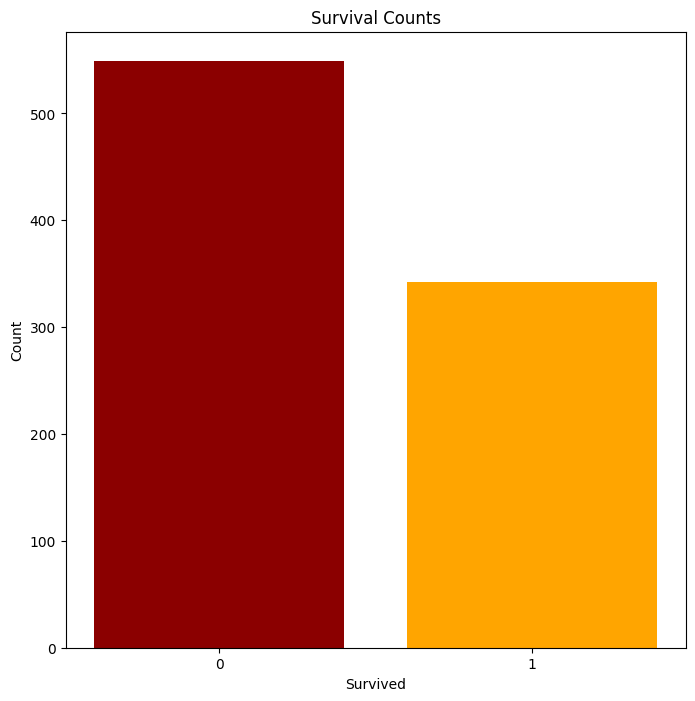

In [14]:
plt.figure(figsize=(8,8))
plt.bar(Survived['Survived'],Survived['count'],color=['darkred','orange'])
plt.xticks(Survived['Survived'])
plt.title('Survival Counts')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()

Penjelasan = 0 == not Survived 1 == survived



In [15]:
survived_male_female = df.groupby('Sex')['Survived'].value_counts().reset_index()
survived_male_female

,Sex,Survived,count
0,female,1,233
1,female,0,81
2,male,0,468
3,male,1,109


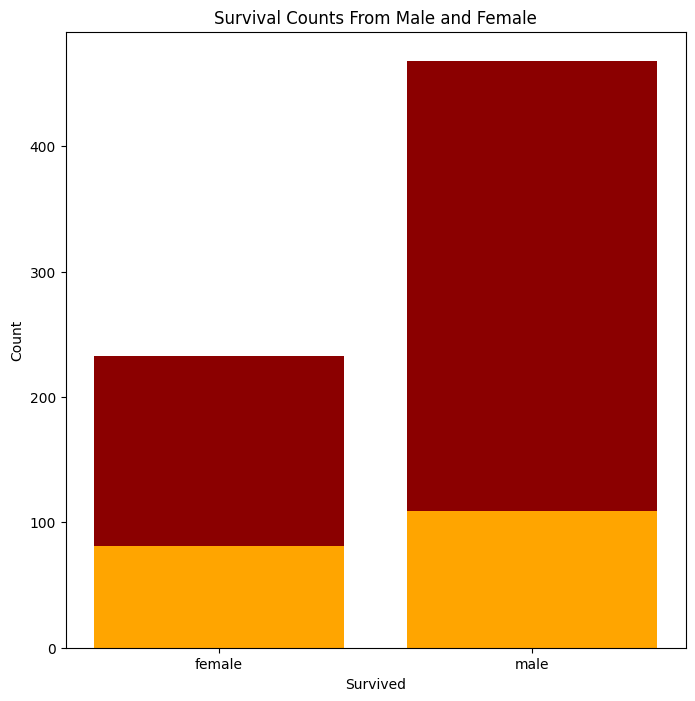

In [16]:
plt.figure(figsize=(8,8))
plt.bar(survived_male_female['Sex'],survived_male_female['count'],color=['darkred','orange'])
plt.xticks(Survived['Survived'])
plt.title('Survival Counts From Male and Female')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()

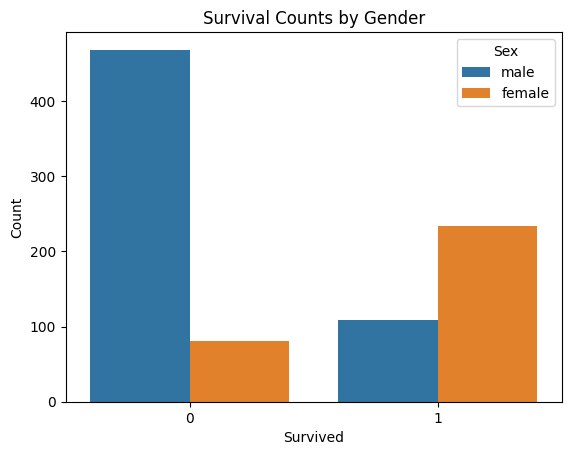

In [17]:
sns.countplot(x="Survived", hue="Sex", data=df)
plt.title("Survival Counts by Gender")
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()

# Training Data

In [18]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [19]:
df.drop(columns=['PassengerId','Name','Ticket' ], inplace=True)

In [20]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.000000,1,0,7.2500,S
1,1,1,female,38.000000,1,0,71.2833,C
2,1,3,female,26.000000,0,0,7.9250,S
3,1,1,female,35.000000,1,0,53.1000,S
4,0,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S
887,1,1,female,19.000000,0,0,30.0000,S
888,0,3,female,29.699118,1,2,23.4500,S
889,1,1,male,26.000000,0,0,30.0000,C


In [21]:
encoder = LabelEncoder()
df["Sex"] = encoder.fit_transform(df["Sex"])
df["Embarked"] = encoder.fit_transform(df['Embarked'])

In [22]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.000000,1,0,7.2500,2
1,1,1,0,38.000000,1,0,71.2833,0
2,1,3,0,26.000000,0,0,7.9250,2
3,1,1,0,35.000000,1,0,53.1000,2
4,0,3,1,35.000000,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,13.0000,2
887,1,1,0,19.000000,0,0,30.0000,2
888,0,3,0,29.699118,1,2,23.4500,2
889,1,1,1,26.000000,0,0,30.0000,0


In [23]:
X = df.drop(columns='Survived', axis=1)
Y = df['Survived']

In [24]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.000000,1,0,7.2500,2
1,1,0,38.000000,1,0,71.2833,0
2,3,0,26.000000,0,0,7.9250,2
3,1,0,35.000000,1,0,53.1000,2
4,3,1,35.000000,0,0,8.0500,2
...,...,...,...,...,...,...,...
886,2,1,27.000000,0,0,13.0000,2
887,1,0,19.000000,0,0,30.0000,2
888,3,0,29.699118,1,2,23.4500,2
889,1,1,26.000000,0,0,30.0000,0


In [25]:
Y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [26]:
X_train, x_test, Y_train, y_test = train_test_split(X,Y, test_size=0.25, random_state=43)

In [27]:
X_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
598,3,1,29.699118,0,0,7.2250,0
841,2,1,16.000000,0,0,10.5000,2
532,3,1,17.000000,1,1,7.2292,0
500,3,1,17.000000,0,0,8.6625,2
438,1,1,64.000000,1,4,263.0000,2
...,...,...,...,...,...,...,...
277,2,1,29.699118,0,0,0.0000,2
817,2,1,31.000000,1,1,37.0042,0
255,3,0,29.000000,0,2,15.2458,0
320,3,1,22.000000,0,0,7.2500,2


In [28]:
x_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
770,3,1,24.000000,0,0,9.5000,2
853,1,0,16.000000,0,1,39.4000,2
144,2,1,18.000000,0,0,11.5000,2
141,3,0,22.000000,0,0,7.7500,2
261,3,1,3.000000,4,2,31.3875,2
...,...,...,...,...,...,...,...
9,2,0,14.000000,1,0,30.0708,0
394,3,0,24.000000,0,2,16.7000,2
528,3,1,39.000000,0,0,7.9250,2
268,1,0,58.000000,0,1,153.4625,2


In [29]:
Y_train

598    0
841    0
532    0
500    0
438    0
      ..
277    0
817    0
255    1
320    0
836    0
Name: Survived, Length: 668, dtype: int64

In [30]:
y_test

770    0
853    1
144    0
141    1
261    1
      ..
9      1
394    1
528    0
268    1
564    0
Name: Survived, Length: 223, dtype: int64

# Logistic Regression Model

In [31]:
log_model = LogisticRegression()


In [32]:
log_model.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

# Accuracy Data

In [35]:
log_model.score(x_test, y_test)

0.7443946188340808

In [36]:
log_model.score(X_train, Y_train)

0.8218562874251497

# Dummy Data

In [38]:
df_dummy = pd.read_csv("https://raw.githubusercontent.com/aryadzar/AI/main/Titanic-Dataset-Dummy.csv")
df_dummy

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,170,0,3,"Ling, Mr. Lee",male,28.0,0,0,1601,56.4958,NaN,S
1,171,0,1,"Van der hoef, Mr. Wyckoff",male,61.0,0,0,111240,33.5000,B19,S
2,172,0,3,"Rice, Master. Arthur",male,4.0,4,1,382652,29.1250,NaN,Q
3,173,1,3,"Johnson, Miss. Eleanor Ileen",female,1.0,1,1,347742,11.1333,NaN,S
4,174,0,3,"Sivola, Mr. Antti Wilhelm",male,21.0,0,0,STON/O 2. 3101280,7.9250,NaN,S
5,175,0,1,"Smith, Mr. James Clinch",male,56.0,0,0,17764,30.6958,A7,C
6,176,0,3,"Klasen, Mr. Klas Albin",male,18.0,1,1,350404,7.8542,NaN,S
7,177,0,3,"Lefebre, Master. Henry Forbes",male,NaN,3,1,4133,25.4667,NaN,S
8,178,0,1,"Isham, Miss. Ann Elizabeth",female,50.0,0,0,PC 17595,28.7125,C49,C
9,179,0,2,"Hale, Mr. Reginald",male,30.0,0,0,250653,13.0000,NaN,S
